In [1]:
import timeit
import numpy as np
from functools import partial
import matplotlib.pyplot as plt

from skimage.exposure import histogram
import pyclesperanto_prototype as prototype
from pyclesperanto import Clesperanto

pyclic = Clesperanto()
pyclic.set_wait_for_kernel_to_finish()

prototype.select_device()
prototype.set_wait_for_kernel_finish()

In [2]:
def benchmark_prototype_size(target_function):
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    sizes = np.arange(1, 50) * 10
    benchmark_data = []

    for size in sizes:
        # make new data
        image = np.random.rand(size, size)
        # bind target function to given image
        partial_function = partial(target_function, image)
        # warmup       
        warm_up_time_in_s = timeit.timeit(partial_function, number=5)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=10)
        # store results
        benchmark_data.append([size, time_in_s])

    return np.asarray(benchmark_data)

def benchmark_pyclic_size(target_function):
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    sizes = np.arange(1, 50) * 10
    benchmark_data = []

    for size in sizes:
        # make new data
        image = np.random.rand(size, size)
        # bind target function to given image
        partial_function = partial(target_function, image)
        # warmup       
        warm_up_time_in_s = timeit.timeit(partial_function, number=5)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=10)
        # store results
        benchmark_data.append([size, time_in_s])

    return np.asarray(benchmark_data)


## Push()

In [3]:
def pyclic_function(image):
    pyclic.push(image)

def prototype_function(image):
    prototype.push(image)

In [4]:
time_pyclic_size = benchmark_pyclic_size(pyclic_function)
time_prototype_size = benchmark_prototype_size(prototype_function)

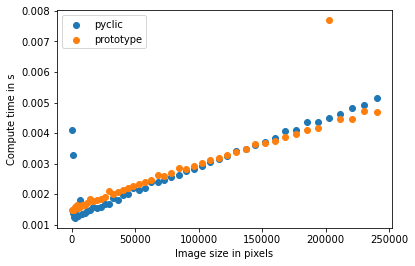

In [5]:
plt.scatter(time_pyclic_size[:,0] ** 2, time_pyclic_size[:,1])
plt.scatter(time_prototype_size[:,0] ** 2, time_prototype_size[:,1])

plt.legend(["pyclic", "prototype"])
plt.xlabel("Image size in pixels")
plt.ylabel("Compute time in s")
plt.show()

# Create()

In [6]:
def pyclic_function(image):
    pyclic.create(image.shape)

def prototype_function(image):
    prototype.create(image.shape)

In [7]:
time_pyclic_size = benchmark_pyclic_size(pyclic_function)
time_prototype_size = benchmark_prototype_size(prototype_function)

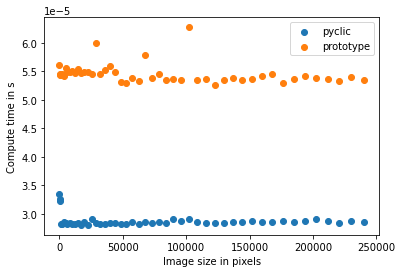

In [8]:
plt.scatter(time_pyclic_size[:,0] ** 2, time_pyclic_size[:,1])
plt.scatter(time_prototype_size[:,0] ** 2, time_prototype_size[:,1])

plt.legend(["pyclic", "prototype"])
plt.xlabel("Image size in pixels")
plt.ylabel("Compute time in s")
plt.show()

# Pull()

In [9]:
def benchmark_prototype_size(target_function):
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    sizes = np.arange(1, 50) * 10
    benchmark_data = []

    for size in sizes:
        # make new data
        image = np.random.rand(size, size)
        gpu_image = prototype.push(image)
        # bind target function to given image
        partial_function = partial(target_function, gpu_image)
        # warmup       
        warm_up_time_in_s = timeit.timeit(partial_function, number=5)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=10)
        # store results
        benchmark_data.append([size, time_in_s])

    return np.asarray(benchmark_data)

def benchmark_pyclic_size(target_function):
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    sizes = np.arange(1, 50) * 10
    benchmark_data = []

    for size in sizes:
        # make new data
        image = np.random.rand(size, size)
        gpu_image = pyclic.push(image)
        # bind target function to given image
        partial_function = partial(target_function, gpu_image)
        # warmup       
        warm_up_time_in_s = timeit.timeit(partial_function, number=5)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=10)
        # store results
        benchmark_data.append([size, time_in_s])

    return np.asarray(benchmark_data)

In [10]:
def pyclic_function(gpu_image):
    pyclic.pull(gpu_image)

def prototype_function(gpu_image):
    prototype.pull(gpu_image)

In [11]:
time_pyclic_size = benchmark_pyclic_size(pyclic_function)
time_prototype_size = benchmark_prototype_size(prototype_function)

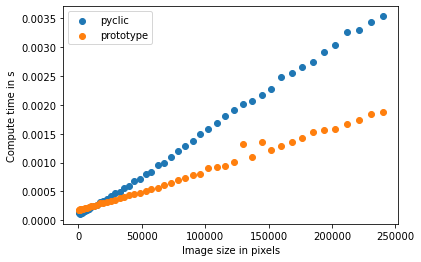

In [12]:
plt.scatter(time_pyclic_size[:,0] ** 2, time_pyclic_size[:,1])
plt.scatter(time_prototype_size[:,0] ** 2, time_prototype_size[:,1])

plt.legend(["pyclic", "prototype"])
plt.xlabel("Image size in pixels")
plt.ylabel("Compute time in s")
plt.show()